# About Wine quality dataset 

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).
Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)<br>

# importing  important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
wine_ds = pd.read_csv("winedata.csv")
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
cp_wine_ds = wine_ds.copy()
cp_wine_ds.shape

(1599, 12)

**Observation**<br>
1. Dataset  has 1599 observations and 12 columns including target column<br>
2. Target columns is a categorical features, having rating 0 to 10, 0 to 6 is consider not good and above or equal to 7 is good<br>
3. hvae created a copy of the original data just to ensure correctness of the data-( not mandatory do) 


In [4]:
cp_wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observations**<br>
All the columns are float type except quality column which is also target column<br>There is not null value in the dataset

In [5]:
# checking descritve analysis
cp_wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observation**<br>
couple of columns are right skewed and have extreme high values<br>Fixed column is right skewed and max value is out of 3rd standand deviation<br>free sulfur dioxide is right skewed and has extreme value followed by total sulfur dioxide etc.. 

# Univariate analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


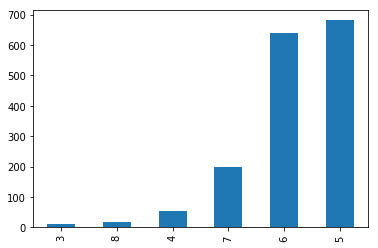

In [6]:
# checking the class label
print(cp_wine_ds.quality.value_counts())
cp_wine_ds.quality.value_counts().sort_values().plot(kind = "bar")

**Observation**<br>
5,6 and 7 quality are  higher in the dataset and contrubutes to 94% of the overall data points 

In [7]:
# conveting the class label's multiple value in to binery format
# 1 == good wine and 0 == not good wine
def convert_class(x):
    if x >=7:
        return 1
    else:
        return 0
cp_wine_ds["quality"] = cp_wine_ds["quality"].map(convert_class)
print(cp_wine_ds["quality"].value_counts()/len(wine_ds)*100)

0    86.429018
1    13.570982
Name: quality, dtype: float64


**Observation**<br>
As per information received that we can merge the class into to make it more easy to understand. it has been converted into 0 and 1 where 0 is not good wine however 1 is good wine.

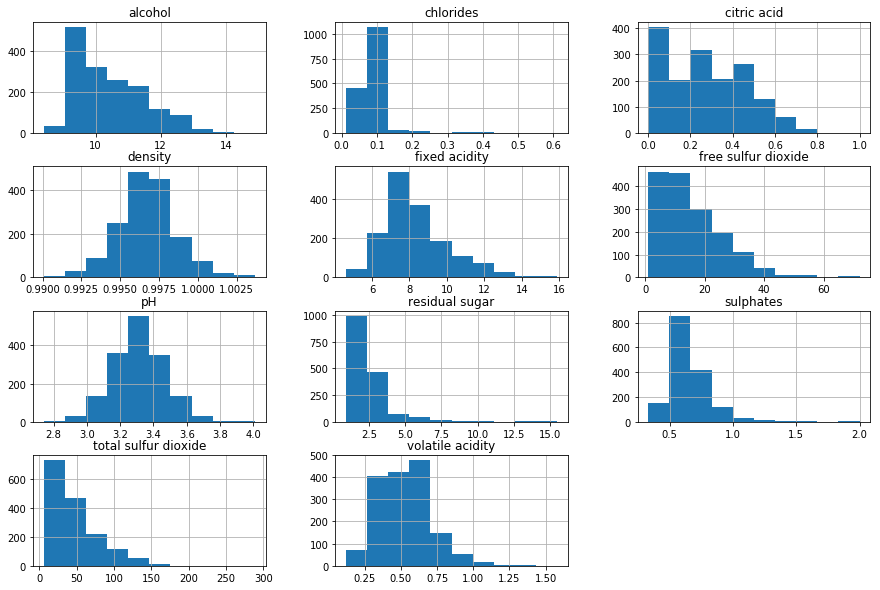

In [8]:
cp_wine_ds.iloc[:,:-1].hist(figsize = (15,10));

**Observation**<br>
1. All the the features are right skewed feature<br>
2. We will use powertransformer to transform the data 


In [9]:
skew = cp_wine_ds.iloc[:,:-1].skew()*100
skew

fixed acidity            98.275144
volatile acidity         67.159257
citric acid              31.833730
residual sugar          454.065543
chlorides               568.034657
free sulfur dioxide     125.056729
total sulfur dioxide    151.553126
density                   7.128766
pH                       19.368350
sulphates               242.867235
alcohol                  86.082881
dtype: float64

fixed acidity,Residual Sugar, chlorides, total sulfer dioxide, free sulfur, sulphates and alcohol are highly right skewed data

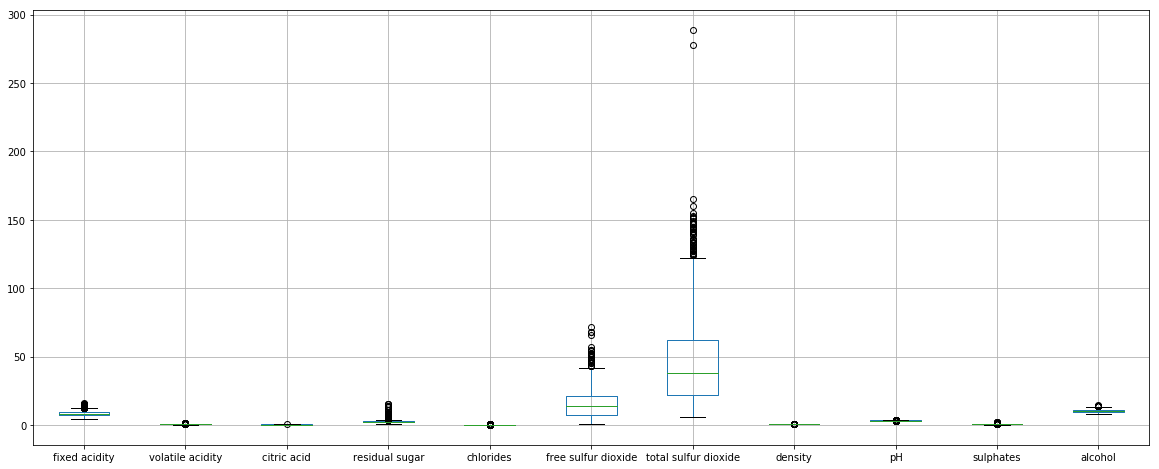

In [10]:
# since all features are numeric so plotting Boxplot
cp_wine_ds.iloc[:,:-1].boxplot(figsize = (20,8)) 

**Observation**<br>
We see that, columns have the outlier values,we need to treat it<br>
we will treat it with Zscore<br> 
scale of the columns are different, we will scaler all the feature to bring every feature at same scale

In [11]:

z_score = np.abs(zscore(cp_wine_ds))

# keeping only those data point which are smaller or equal to 3 SD away from the mean
cp_wine_ds = cp_wine_ds[(z_score <= 3 ).all(axis = 1)] 


print((len(wine_ds)-len(cp_wine_ds))/len(wine_ds)*100," Data lose post removal of outlier")

8.818011257035648  Data lose post removal of outlier


**Observation**<br>
1. we have applied zscore for outlier treatment<br>
2. post outlier treatmen, we lost approx 9% data from the original data

# Bivariate analysis

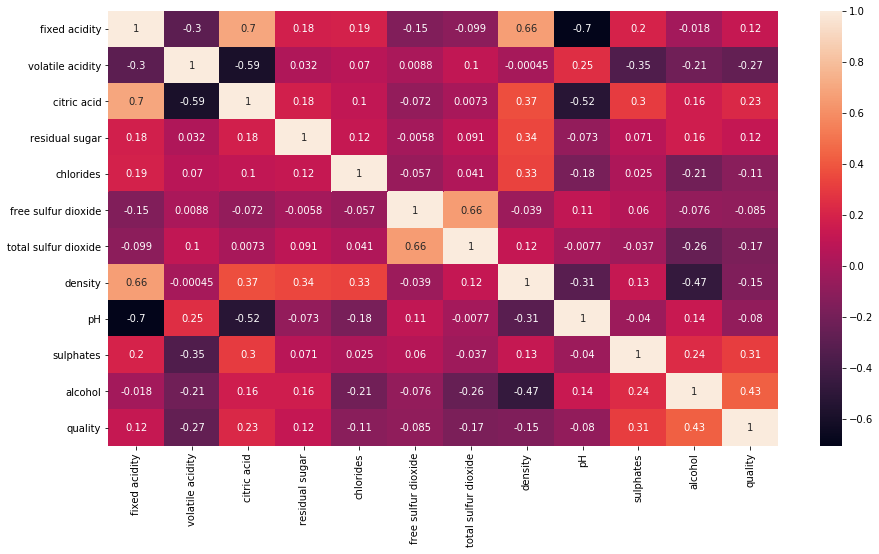

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(cp_wine_ds.corr(),annot= True)

**Observation**<br>
1. Alhocol, sulphate, citric acid, residual sugar and fixed acid have positive correlation<br> 
2. other features are having negative correlation

# Data preparation for model

In [13]:
PT = PowerTransformer(method ='yeo-johnson',standardize=False)
X = PT.fit_transform(cp_wine_ds.iloc[:,:-1])
y = cp_wine_ds["quality"]

# Scalling the data

sc = StandardScaler() # creating the instance
X = sc.fit_transform(X) # transforming X

# dividing data into train & test and for that we are train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.22, random_state = 155) # faa spliting

**Observation**<br>
1. Due to lot of skewness in the data, we have used powertransformer to transform the data point.
2. post transformation, we scalled all the data point with Standard scaler
3. spliting data in train_and test

# Modeling & Evaluations

In [21]:
models = [LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]

for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Accuracy score",model, "=",accuracy_score(pred,y_test))
    print("Classification report",model,"\n",classification_report(pred,y_test))
    print("confusion matrix",model,"\n",confusion_matrix(pred,y_test))
    print("\n")

Accuracy score LogisticRegression() = 0.881619937694704
Classification report LogisticRegression() 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       289
           1       0.43      0.56      0.49        32

    accuracy                           0.88       321
   macro avg       0.69      0.74      0.71       321
weighted avg       0.90      0.88      0.89       321

confusion matrix LogisticRegression() 
 [[265  24]
 [ 14  18]]


Accuracy score DecisionTreeClassifier() = 0.8598130841121495
Classification report DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       272
           1       0.55      0.47      0.51        49

    accuracy                           0.86       321
   macro avg       0.73      0.70      0.71       321
weighted avg       0.85      0.86      0.86       321

confusion matrix DecisionTreeClassifier() 
 [[253  19]
 [ 26  23]]


A

**Observation**<br>
1. we have trained data on multiple models<br>
2. Randoforest is giving highest accuracy along with good F1 score for both the class<br>
3. we are taking Randomforest as a final algorigh for final model building

# hyper paramter tuning

In [15]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(X_train,y_train)
# pred = RF.predict(X_test)
# print("Accuracy score ",accuracy_score(pred,y_test))
# print("\n")
# print("Classification report\n",classification_report(pred,y_test))

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8]},
                   scoring='accuracy')

In [16]:
print("best- parameter",grid.best_params_)
print("score",grid.best_score_)

best- parameter {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}
score 0.8944547492078213


In [22]:
best_parameter_RF = RandomForestClassifier(min_samples_split= 8, min_samples_leaf = 3, max_samples =0.4, max_features = 'auto',max_depth = 5, criterion = 'entropy')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,X,y,cv=5)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.878600009414866 and the SD is 0.00637992913290775
at CV 3 The mean is  0.877227792684649 and the SD is 0.0026220909094226675
at CV 4 The mean is  0.8751682907310643 and the SD is 0.0028753072663532317
at CV 5 The mean is  0.8786047168479028 and the SD is 0.005031684427809288
at CV 6 The mean is  0.8751753518806196 and the SD is 0.0059048766695857175


**Oservation**<br>
1. since Randomforest worked well out of all other model, so we have done the hyperparameter tuning to set the best parameter for final model<br>
2. have checked the best CV as well that at level of CV is generated the best score and we have found CV 3 is at best

In [23]:
# cross validation
cv = cross_val_score(best_parameter_RF,X,y,cv=3)
print(f'The mean is {cv.mean()} and the SD is {cv.std()}') 

The mean is 0.8792866941015088 and the SD is 0.010801108194803583


<BarContainer object of 11 artists>

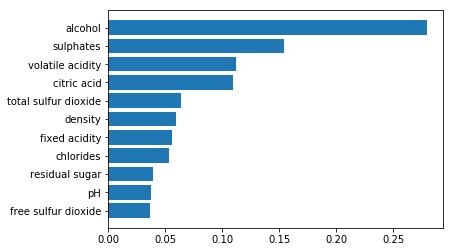

In [24]:
# taking the important feature 
best_parameter_RF.fit(X,y)
sort_index = best_parameter_RF.feature_importances_.argsort()
plt.barh(wine_ds.iloc[:,:-1].columns[sort_index], best_parameter_RF.feature_importances_[sort_index])

**Observation**<br>
**Top 5 important featuer are below**<br> 
Alcohol, sulphates,volatile acidity,density and citric acid are major contributor features.

# Model Saving

In [26]:
import pickle
filename = "Wine_quality.pkl"
pickle.dump(best_parameter_RF,open(filename,'wb'))